In [19]:
import pandas as pd
import os
import glob
import matplotlib.pyplot as plt

In [15]:
dades = {}
for file in glob.glob("dades_merged/*.csv"):
    nfile = file.split("/")[-1].split(".")[0]
    print(nfile)
    dades[nfile] = pd.read_csv(file)


padro_ocupacio_mitjana
contractes_lloguer
renda_barcelona
distribucio_territorial_renda_familiar
renda_neta_mitjana_per_persona
canvis_de_domicili_nacionalitat
lloguer_preu_trim
domicilis_nacionalitat_espanyola_estrangera


In [29]:
dades["lloguer_preu_trim"]
dades["lloguer_preu_trim"].keys()

Index(['Unnamed: 0', 'Any', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Seccio_Censal', 'Import_Euros '],
      dtype='object')

In [76]:
def preus_lloguers_any(nom_districte):
    preus_lloguers = dades["lloguer_preu_trim"]
    preus_lloguers = preus_lloguers[preus_lloguers["Nom_Districte"] == nom_districte]

    lineplot = {}
    av = {}

    for (x, y) in zip(preus_lloguers["Any"], preus_lloguers["Import_Euros "]):
        if x in av: 
            lineplot[x] += y
            av[x] += 1
        else: 
            lineplot[x] = y
            av[x] = 1

    return [x for x in lineplot], [lineplot[x]/av[x] for x in lineplot]



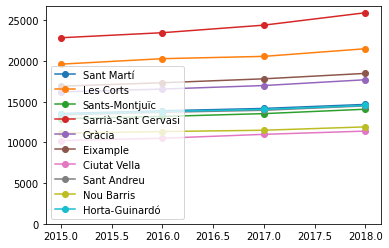

In [81]:
districtes = {}
for x in dades["lloguer_preu_trim"]["Nom_Districte"]:
    if not x in districtes: districtes[x] = 1

c = []
ys = []
for i_d, d in enumerate(districtes):
    x, y = preus_lloguers_any(d)
    plt.plot(x, y, "-o", label=d)
plt.legend()
plt.yticks([i for i in range(0, 26000, 5000)])
plt.show()
    

In [95]:
def salari_any(nom_districte):
    renda = dades["renda_neta_mitjana_per_persona"]
    renda = renda[renda["Nom_Districte"] == nom_districte]

    lineplot = {}
    av = {}

    for (x, y) in zip(renda["Any"], renda["Import_Euros "]):
        if x in av: 
            lineplot[x] += y
            av[x] += 1
        else: 
            lineplot[x] = y
            av[x] = 1

    return [x for x in lineplot], [lineplot[x]/av[x] for x in lineplot]


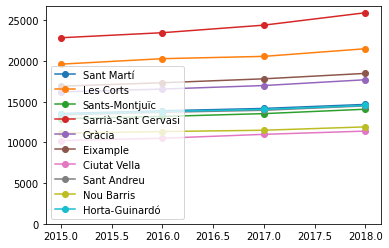

In [96]:

c = []
ys = []
for i_d, d in enumerate(districtes):
    x, y = salari_any(d)
    plt.plot(x, y, "-o", label=d)
plt.legend()
plt.yticks([i for i in range(0, 26000, 5000)])
plt.show()
    